1. **Proportion of Charge Sheets Completed Over Time**

•	Plot: Stacked bar chart for each crime head, showing the proportion of charge sheets completed within each time frame (e.g., <=2 months, <=3 months, etc.).

•	Objective: Understand the speed of charge sheet completion for different crimes. This can reveal patterns where certain crime types are processed faster or slower than others.
bold text

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


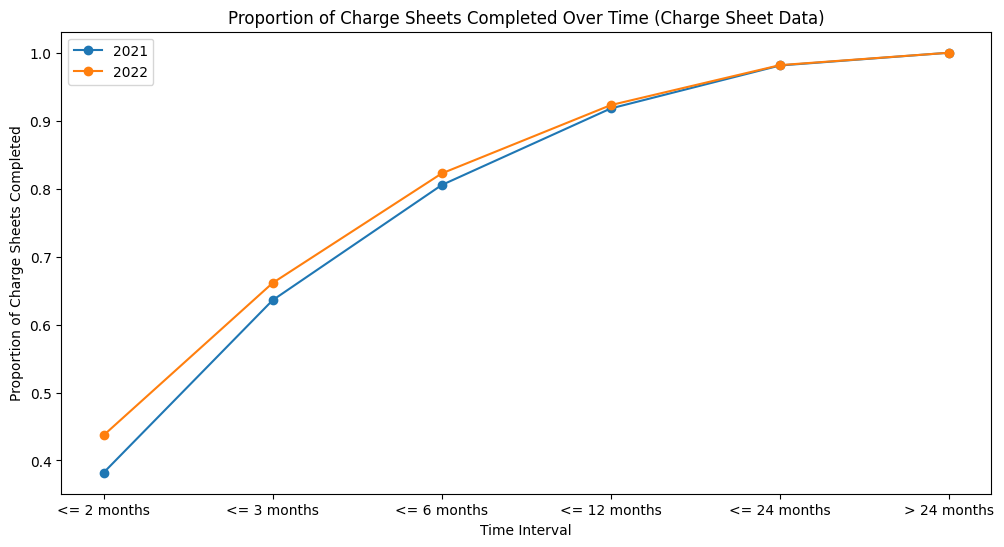

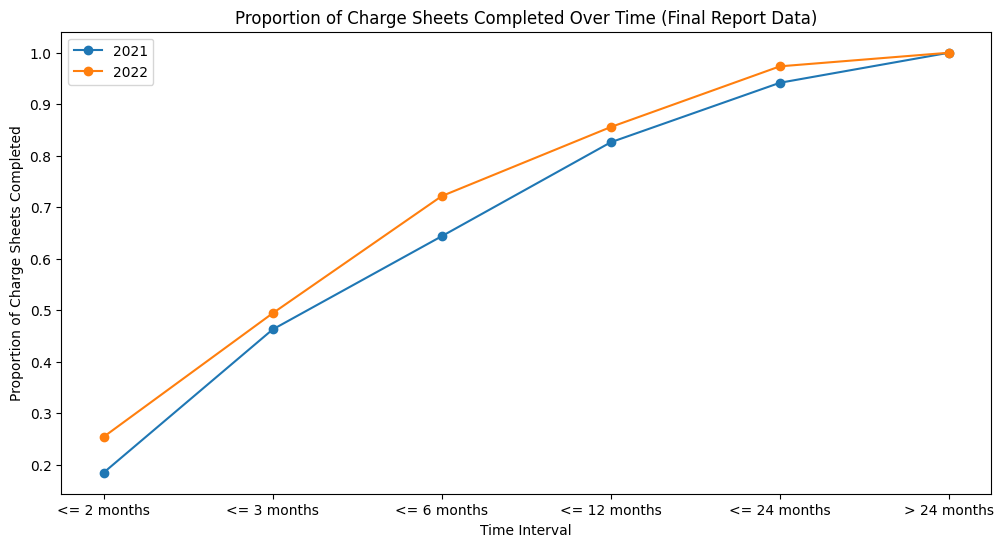

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from the four files
chargesheet_2021 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/3/chargesheet 2021.xlsx')
chargesheet_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/3/chargesheet 2022.xlsx')
finalreport_2021 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/3/finalReport 2021.xlsx')
finalreport_2022 = pd.read_excel('/content/drive/My Drive/Dataset_EDA/3/finalReport 2022.xlsx')
# List of time intervals
time_intervals = ['<= 2 months', '<= 3 months', '<= 6 months', '<= 12 months', '<= 24 months', '> 24 months']

# Function to calculate the proportion of charge sheets completed for each time interval
def calculate_proportions(df):
    total_chargesheets = df['Total #']
    proportions = df[time_intervals].divide(total_chargesheets, axis=0)
    return proportions

# Calculate proportions for each dataset
proportions_chargesheet_2021 = calculate_proportions(chargesheet_2021)
proportions_chargesheet_2022 = calculate_proportions(chargesheet_2022)
proportions_finalreport_2021 = calculate_proportions(finalreport_2021)
proportions_finalreport_2022 = calculate_proportions(finalreport_2022)

# Function to plot the proportions over time for a specific year
def plot_proportions(proportions, year, title):
    mean_proportions = proportions.mean(axis=0)  # Calculate mean proportions for each time interval
    plt.plot(time_intervals, mean_proportions, marker='o', label=year)
    plt.title(title)
    plt.xlabel('Time Interval')
    plt.ylabel('Proportion of Charge Sheets Completed')
    plt.legend()
    plt.grid()

# Plot proportions for Charge Sheets in 2021 and 2022
plt.figure(figsize=(12, 6))
plot_proportions(proportions_chargesheet_2021, '2021', 'Proportion of Charge Sheets Completed Over Time (Charge Sheet Data)')
plot_proportions(proportions_chargesheet_2022, '2022', 'Proportion of Charge Sheets Completed Over Time (Charge Sheet Data)')
plt.show()

# Plot proportions for Final Reports in 2021 and 2022
plt.figure(figsize=(12, 6))
plot_proportions(proportions_finalreport_2021, '2021', 'Proportion of Charge Sheets Completed Over Time (Final Report Data)')
plot_proportions(proportions_finalreport_2022, '2022', 'Proportion of Charge Sheets Completed Over Time (Final Report Data)')
plt.show()





2. **Average Time to Complete Charge Sheets**

•	Plot: Bar chart showing the average time (in months) to complete charge sheets for each crime head.

•	Objective: Quantify the average time taken for different crimes, which can be helpful for resource allocation and process optimization insights


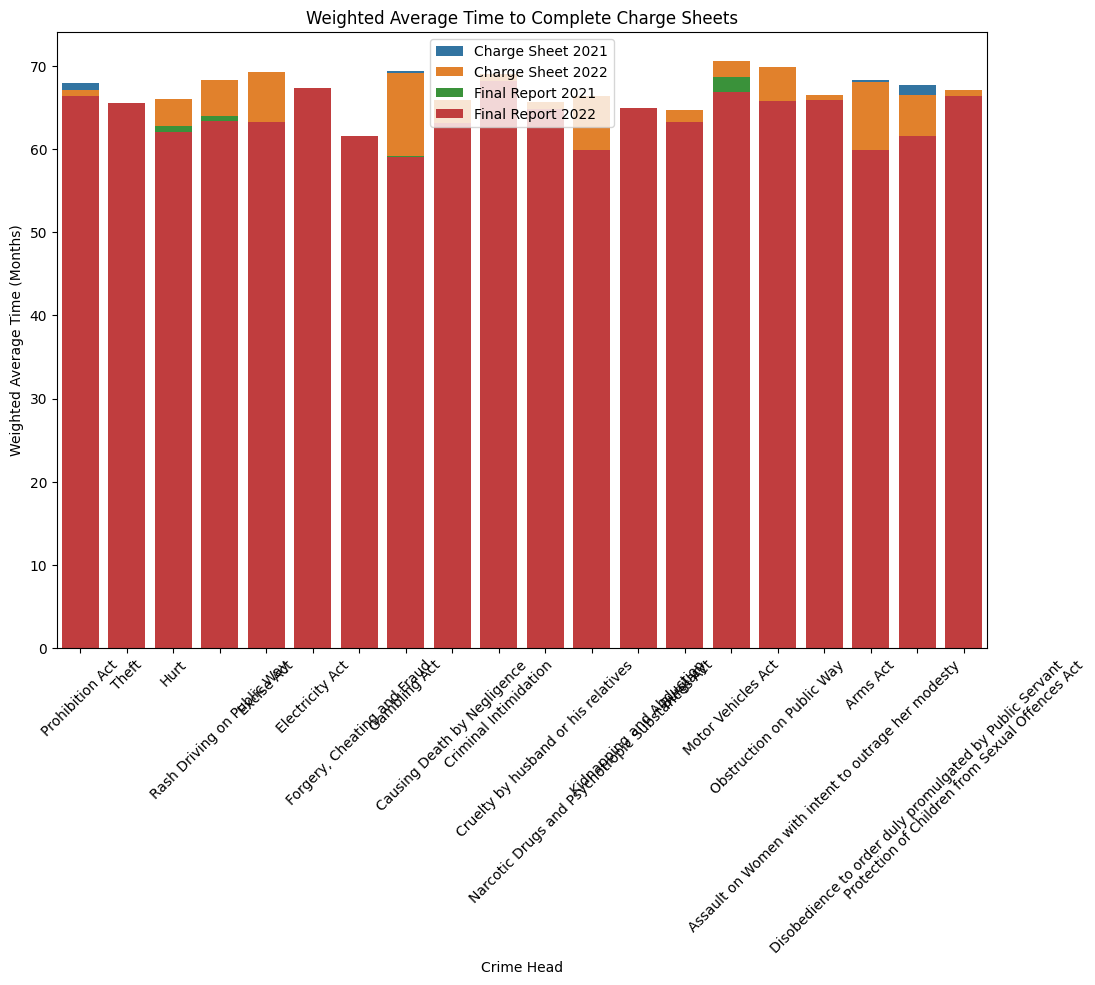

In [3]:
def calculate_weighted_average_time(df):
    time_weights = [2, 3, 6, 12, 24, 24]
    df['Weighted Time'] = df[time_intervals].mul(time_weights, axis=1).sum(axis=1)
    df['Weighted Average Time'] = df['Weighted Time'] / df['Total #']
    return df

# Calculate weighted average time for each dataset
weighted_cs2021 = calculate_weighted_average_time(chargesheet_2021)
weighted_cs2022 = calculate_weighted_average_time(chargesheet_2022)
weighted_fr2021 = calculate_weighted_average_time(finalreport_2021)
weighted_fr2022 = calculate_weighted_average_time(finalreport_2022)

# Plot the weighted average time for each crime head
plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Head', y='Weighted Average Time', data=weighted_cs2021, label='Charge Sheet 2021')
sns.barplot(x='Crime Head', y='Weighted Average Time', data=weighted_cs2022, label='Charge Sheet 2022')
sns.barplot(x='Crime Head', y='Weighted Average Time', data=weighted_fr2021, label='Final Report 2021')
sns.barplot(x='Crime Head', y='Weighted Average Time', data=weighted_fr2022, label='Final Report 2022')
plt.title('Weighted Average Time to Complete Charge Sheets')
plt.xlabel('Crime Head')
plt.ylabel('Weighted Average Time (Months)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

4. **Distribution of Cases Over Time Intervals**

•	Plot: Heatmap of time intervals (<=2 months, <=3 months, etc.) across crime heads, with color intensity representing the proportion or count of cases completed within each interval.

•	Objective: Visualize the distribution of cases over time intervals to see if any specific crimes tend to cluster around certain processing times


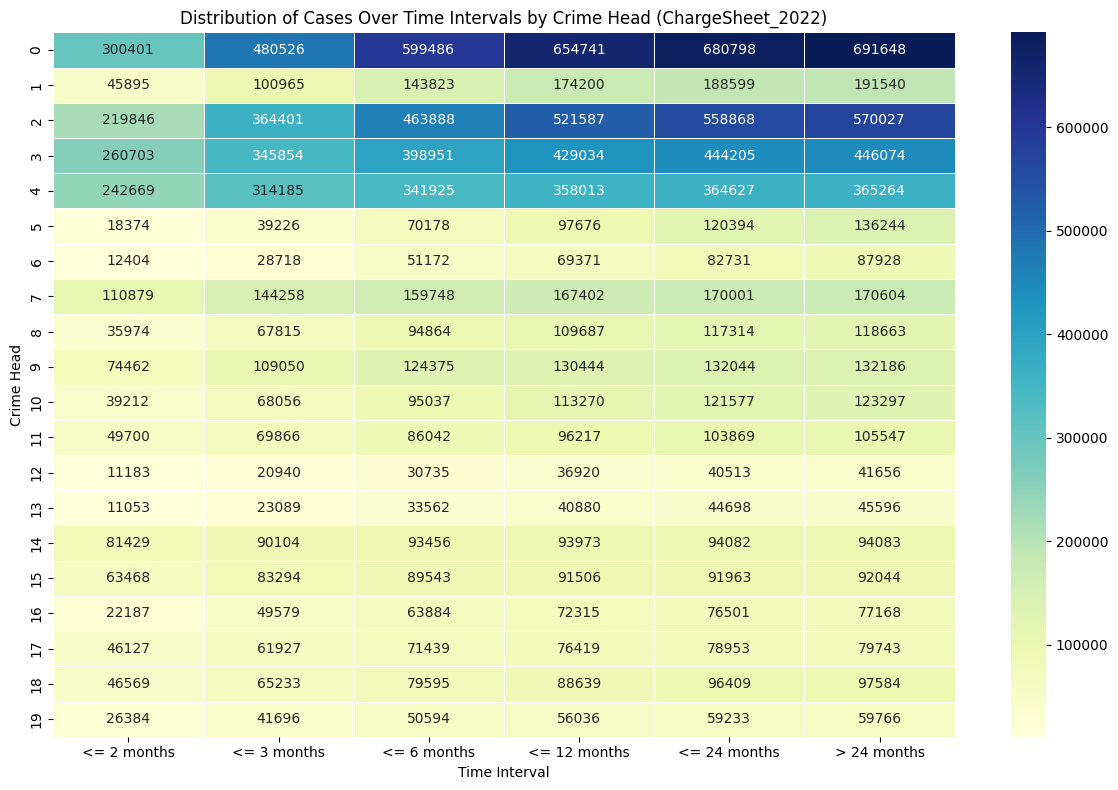

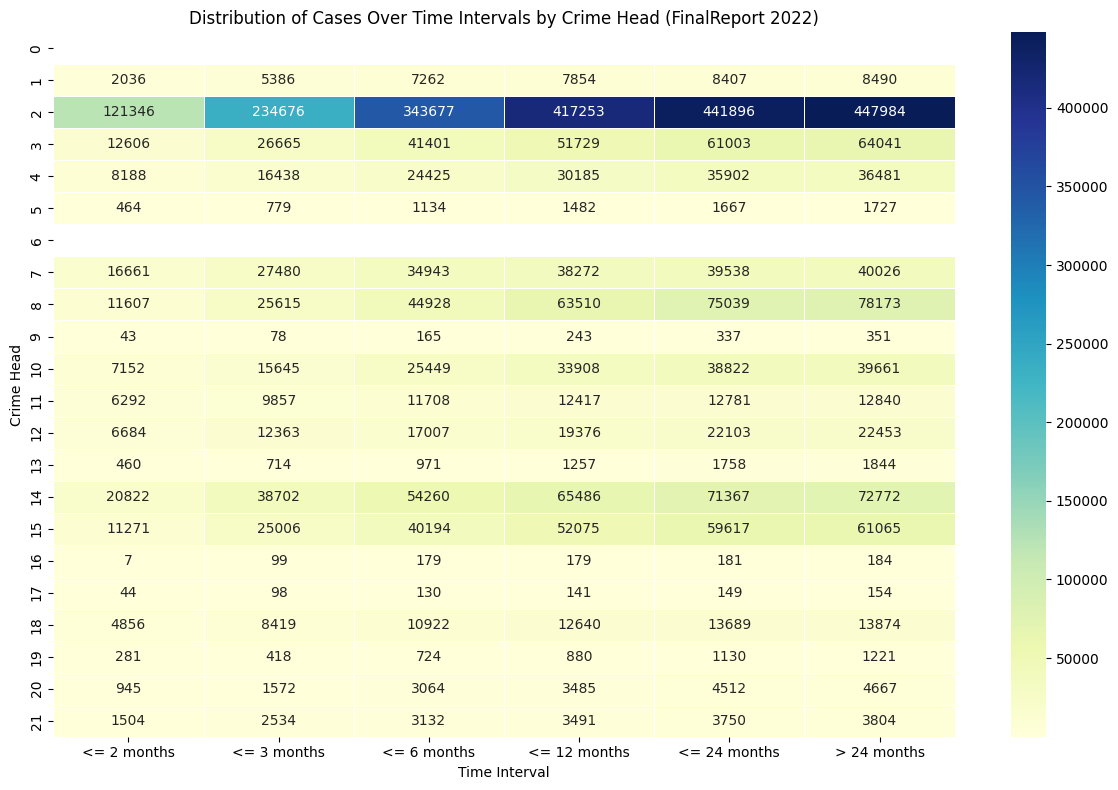

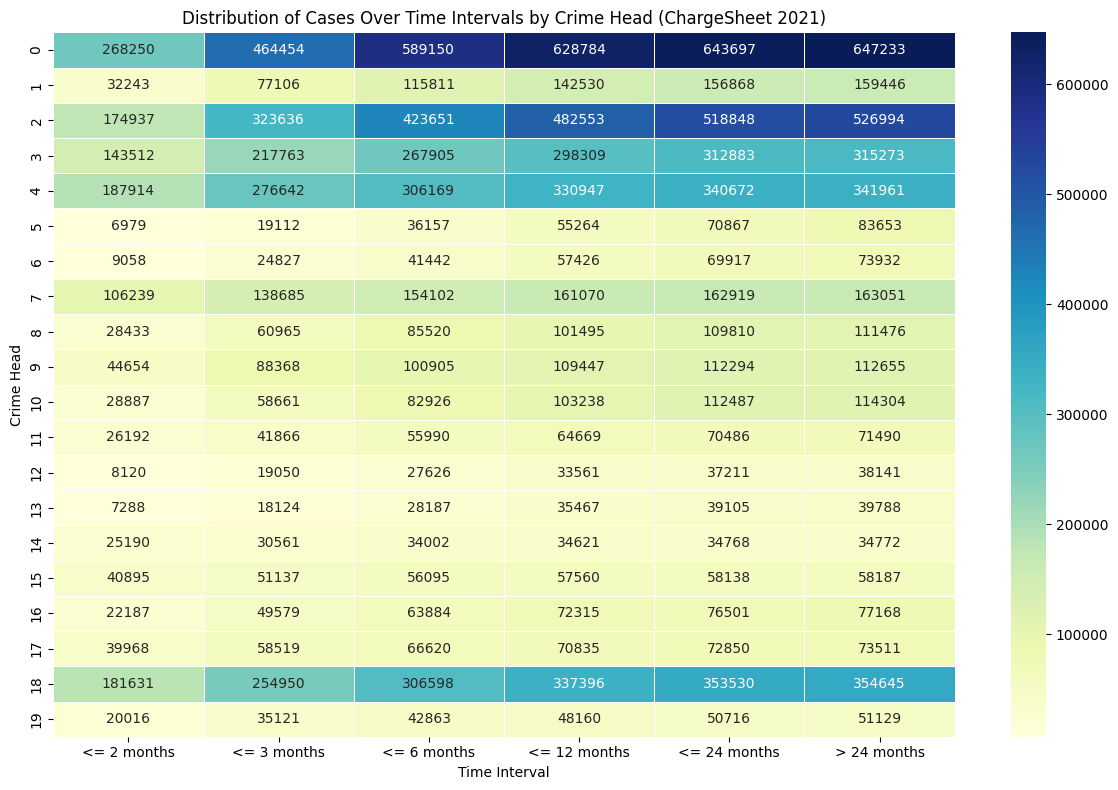

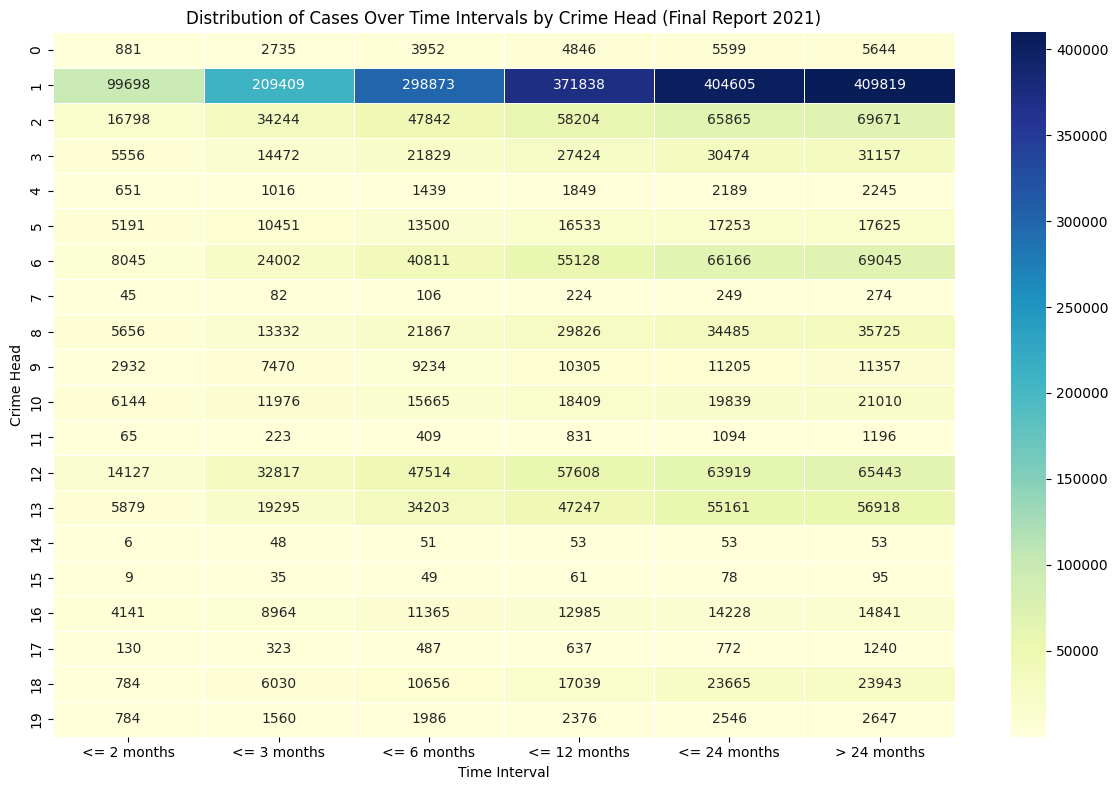

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(chargesheet_2022[time_intervals], annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Distribution of Cases Over Time Intervals by Crime Head (ChargeSheet_2022)')
plt.xlabel('Time Interval')
plt.ylabel('Crime Head')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(finalreport_2022[time_intervals], annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Distribution of Cases Over Time Intervals by Crime Head (FinalReport 2022)')
plt.xlabel('Time Interval')
plt.ylabel('Crime Head')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(chargesheet_2021[time_intervals], annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Distribution of Cases Over Time Intervals by Crime Head (ChargeSheet 2021)')
plt.xlabel('Time Interval')
plt.ylabel('Crime Head')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(finalreport_2021[time_intervals], annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title('Distribution of Cases Over Time Intervals by Crime Head (Final Report 2021)')
plt.xlabel('Time Interval')
plt.ylabel('Crime Head')
plt.tight_layout()
plt.show()

4. **Comparison of IPC vs. SLL for Each Crime Head**

•	Plot: Side-by-side bar charts or grouped bar charts for each crime head, comparing IPC and SLL case completion times within each time interval.

•	Objective: Identify any differences in processing times between IPC and SLL cases for the same crime types, revealing if any category consistently receives faster or slower processing


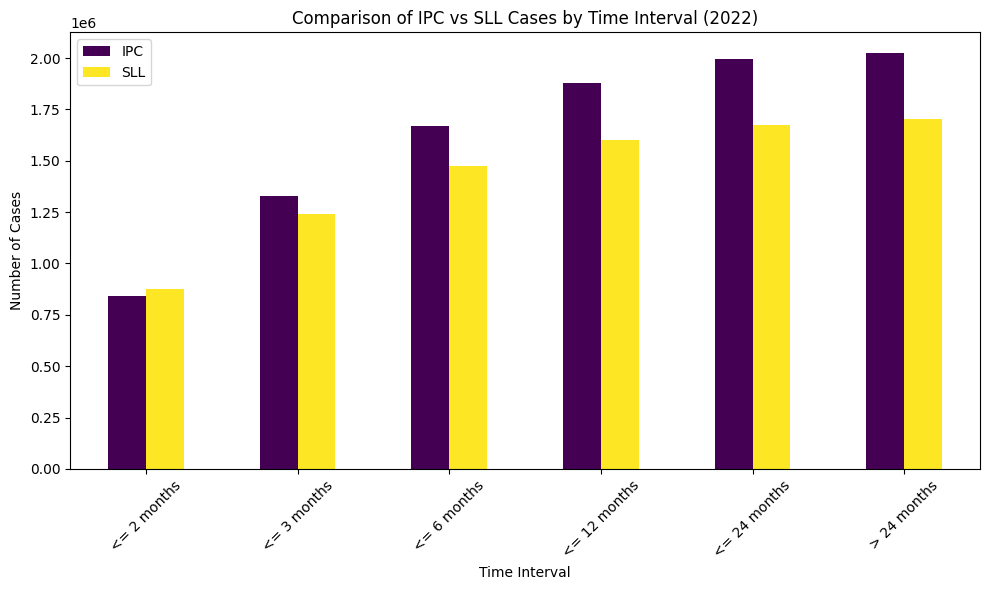

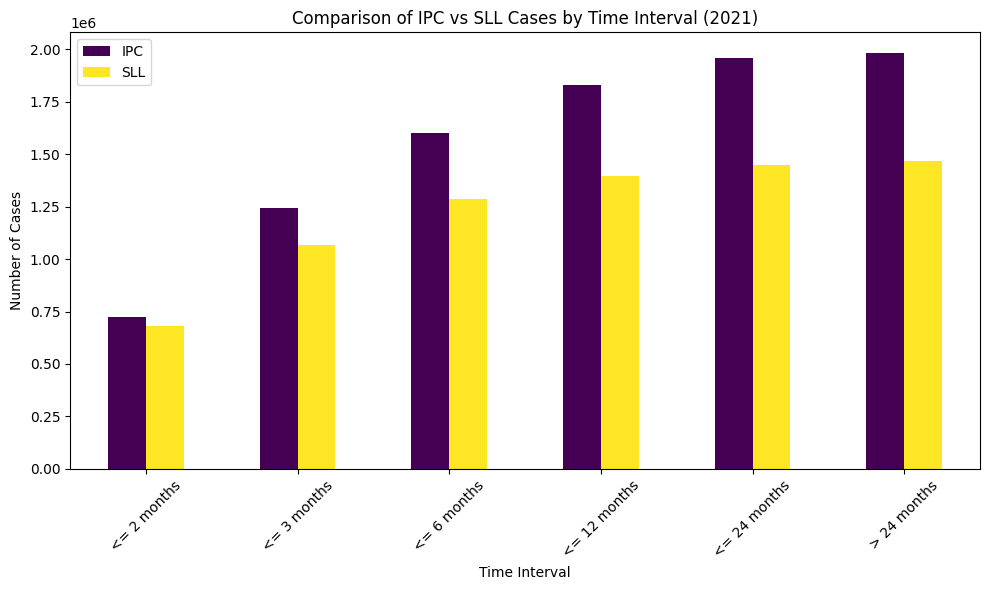

In [5]:
# Filter IPC and SLL cases separately
ipc_cases = chargesheet_2022[chargesheet_2022['IPC / SLL'] == 'IPC']
sll_cases = chargesheet_2022[chargesheet_2022['IPC / SLL'] == 'SLL']

# Plot grouped bar chart for IPC vs SLL
time_intervals = ['<= 2 months', '<= 3 months', '<= 6 months', '<= 12 months', '<= 24 months', '> 24 months']
ipc_averages = ipc_cases[time_intervals].sum()
sll_averages = sll_cases[time_intervals].sum()

df_ipc_sll = pd.DataFrame({'IPC': ipc_averages, 'SLL': sll_averages})
df_ipc_sll.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of IPC vs SLL Cases by Time Interval (2022)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter IPC and SLL cases separately
ipc_cases = chargesheet_2021[chargesheet_2021['IPC / SLL'] == 'IPC']
sll_cases = chargesheet_2021[chargesheet_2021['IPC / SLL'] == 'SLL']

# Plot grouped bar chart for IPC vs SLL
time_intervals = ['<= 2 months', '<= 3 months', '<= 6 months', '<= 12 months', '<= 24 months', '> 24 months']
ipc_averages = ipc_cases[time_intervals].sum()
sll_averages = sll_cases[time_intervals].sum()

df_ipc_sll = pd.DataFrame({'IPC': ipc_averages, 'SLL': sll_averages})
df_ipc_sll.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Comparison of IPC vs SLL Cases by Time Interval (2021)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
